In [68]:
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
import numpy as np

In [46]:
#read all lines into a list
def read_all(path):
    files= os.listdir(path) 
    result = []
    for file in files: 
        with open(path + "/" + file) as f:
            for line in f:
                result.append(json.loads(line))
    return result

In [47]:
def filter_by_prefix(cate_year_score, field, prefix):
    res = []
    for i in range(len(cate_year_score)):
        if str(cate_year_score[i][field]).startswith(prefix):
            res.append(cate_year_score[i])
    return res

In [56]:
def sort_by_score(cate_year_score):
    def extract_score(json):
        try:
            return int(json['paper_score'])
        except KeyError:
            return 0
    cate_year_score.sort(key = extract_score, reverse = True)

In [57]:
#[start_year, end_year]
def topN_category_every_year(cate_year_score, n, start_year, end_year):
    res = []
    for year in range(start_year, end_year + 1):
        this_year_score = filter_by_prefix(cate_year_score, "year", str(year))
        sort_by_score(this_year_score)
        res.append(this_year_score[0:(n+1)])
    return res

In [63]:
def ranking_pass_years(cate_year_score, category, start_year, end_year):
    def find_ranking(sort_list):
        index = 1
        for i in range(len(sort_list)):
            if(sort_list[i]['cate'].startswith(category)):
                return index
            index += 1
            
    res = []
    for year in range(start_year, end_year + 1):
        this_year_score = filter_by_prefix(cate_year_score, "year", str(year))
        sort_by_score(this_year_score)
        res.append(find_ranking(this_year_score))
    return res

In [50]:
cate_year_score = read_all("./paper_score")
for i in range(3):
    print(cate_year_score[i])

{'cate': 'physics.space-ph', 'year': 2008, 'paper_score': 532}
{'cate': 'cs.DB', 'year': 2015, 'paper_score': 557}
{'cate': 'cs.IR', 'year': 2009, 'paper_score': 1075}


In [58]:
cs_category_year_score = filter_by_prefix(cate_year_score, "cate", "cs.")
for i in range(3):
    print(cs_category_year_score[i])

{'cate': 'cs.DB', 'year': 2015, 'paper_score': 557}
{'cate': 'cs.IR', 'year': 2009, 'paper_score': 1075}
{'cate': 'cs.MM', 'year': 2016, 'paper_score': 168}


In [59]:
#top 20 category in 2018
res = topN_category_every_year(cs_category_year_score, 20, 2018, 2018)

In [54]:
res

[[{'cate': 'cs.LG', 'year': 2018, 'paper_score': 231},
  {'cate': 'cs.DS', 'year': 2018, 'paper_score': 151},
  {'cate': 'cs.IT', 'year': 2018, 'paper_score': 105},
  {'cate': 'cs.DM', 'year': 2018, 'paper_score': 70},
  {'cate': 'cs.CR', 'year': 2018, 'paper_score': 68},
  {'cate': 'cs.CG', 'year': 2018, 'paper_score': 53},
  {'cate': 'cs.CC', 'year': 2018, 'paper_score': 49},
  {'cate': 'cs.GT', 'year': 2018, 'paper_score': 41},
  {'cate': 'cs.DC', 'year': 2018, 'paper_score': 39},
  {'cate': 'cs.SI', 'year': 2018, 'paper_score': 33},
  {'cate': 'cs.DB', 'year': 2018, 'paper_score': 23},
  {'cate': 'cs.LO', 'year': 2018, 'paper_score': 23},
  {'cate': 'cs.NA', 'year': 2018, 'paper_score': 18},
  {'cate': 'cs.HC', 'year': 2018, 'paper_score': 14},
  {'cate': 'cs.NI', 'year': 2018, 'paper_score': 13},
  {'cate': 'cs.IR', 'year': 2018, 'paper_score': 11},
  {'cate': 'cs.PF', 'year': 2018, 'paper_score': 9},
  {'cate': 'cs.CV', 'year': 2018, 'paper_score': 9},
  {'cate': 'cs.SC', 'year':

In [77]:
def plot_ranking(cs_category_year_score, category, start_year, end_year):
    ranking = ranking_pass_years(cs_category_year_score, category, start_year, end_year)
    plt.gca().invert_yaxis()
    plt.plot(np.arange(2008, 2019, 1), ranking)

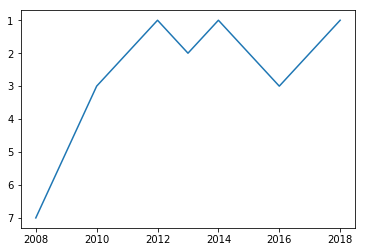

In [78]:
#cs.LG - Machine Learning
# find the ranking of Machine Learning in the pass 10 years
plot_ranking(cs_category_year_score, 'cs.LG', 2008, 2018)

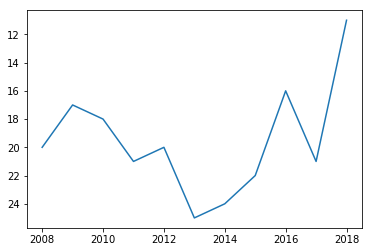

In [79]:
#cs.DB - Databases
plot_ranking(cs_category_year_score, 'cs.DB', 2008, 2018)